<a href="https://colab.research.google.com/github/Vishnu-K-Menon/flower-classification/blob/main/flower_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import zipfile

In [51]:
!wget --no-check-certificate \
    "https://github.com/Vishnu-K-Menon/flower-classification/archive/refs/heads/main.zip" \
    -O "/tmp/flowers.zip"

zip_ref = zipfile.ZipFile('/tmp/flowers.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()


--2022-07-16 11:26:00--  https://github.com/Vishnu-K-Menon/flower-classification/archive/refs/heads/main.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Vishnu-K-Menon/flower-classification/zip/refs/heads/main [following]
--2022-07-16 11:26:00--  https://codeload.github.com/Vishnu-K-Menon/flower-classification/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 13.112.159.149
Connecting to codeload.github.com (codeload.github.com)|13.112.159.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/flowers.zip’

/tmp/flowers.zip        [                <=> ] 450.93M  14.2MB/s    in 33s     

2022-07-16 11:26:34 (13.7 MB/s) - ‘/tmp/flowers.zip’ saved [472833502]



In [59]:
base_dir = '/tmp/flower-classification-main/flowerssplit/train'

daisy_dir = os.path.join(base_dir, 'daisy')
dandelion_dir = os.path.join(base_dir, 'dandelion')
rose_dir = os.path.join(base_dir, 'rose')
sunflower_dir = os.path.join(base_dir, 'sunflower')
tulip_dir = os.path.join(base_dir, 'tulip')

print('total training daisy images:', len(os.listdir(daisy_dir)))
print('total training dandelion images:', len(os.listdir(dandelion_dir)))
print('total training rose images:', len(os.listdir(rose_dir)))
print('total training sunflower images:', len(os.listdir(sunflower_dir)))
print('total training tulip images:', len(os.listdir(tulip_dir)))

daisy_files = os.listdir(daisy_dir)
print(daisy_files[:10])

dandelion_files = os.listdir(dandelion_dir)
print(dandelion_files[:10])

rose_files = os.listdir(rose_dir)
print(rose_files[:10])

sunflower_files = os.listdir(sunflower_dir)
print(sunflower_files[:10])

tulip_files = os.listdir(tulip_dir)
print(tulip_files[:10])

total training daisy images: 611
total training dandelion images: 841
total training rose images: 627
total training sunflower images: 586
total training tulip images: 787
['6480809771_b1e14c5cc2_m.jpg', '5586977262_6b24412805_n.jpg', '2573240560_ff7ffdd449.jpg', '1879567877_8ed2a5faa7_n.jpg', '33838292353_8b143f7980_n.jpg', '8008629838_c62bb2b016_n.jpg', '19544831049_0d738d4872_m.jpg', '3711723108_65247a3170.jpg', '11834945233_a53b7a92ac_m.jpg', '506018088_4f7a15a7c5_n.jpg']
['18183515403_13a9ca6d86_n.jpg', '16495282564_d8c34d6a2e_m.jpg', '14164392167_650946a169_n.jpg', '14128835667_b6a916222c.jpg', '2963905796_227d37ff12.jpg', '17688233756_21879104c1_n.jpg', '7295618968_c08a326cc1_m.jpg', '33071081032_a6a1e4b311_n.jpg', '17029965300_8e755c2214_n.jpg', '7164500544_332b75aa3b.jpg']
['6864417932_36fa4ceecf_n.jpg', '5349254467_388ff94f8b_n.jpg', '16670921315_0fc48d7ab2_n.jpg', '16903172207_2cd7aca66a.jpg', '3871586333_5a708d5cf4_n.jpg', '5799616059_0ffda02e54.jpg', '8853083579_dd1dfa3188

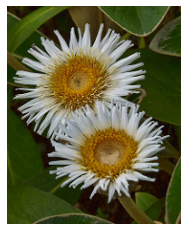

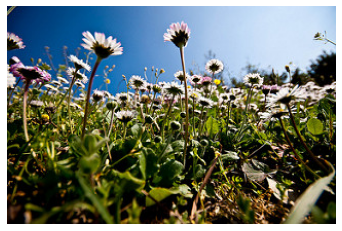

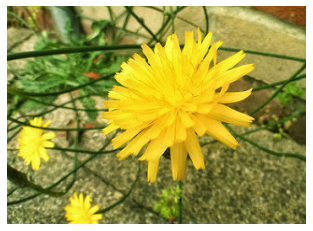

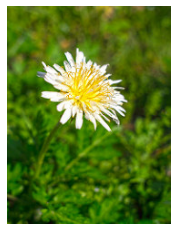

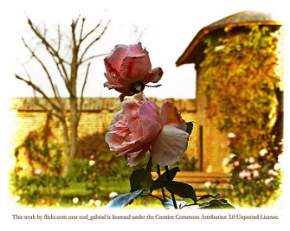

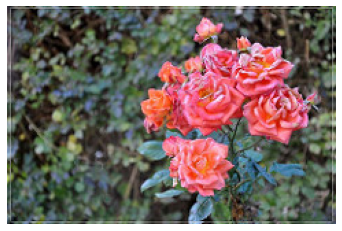

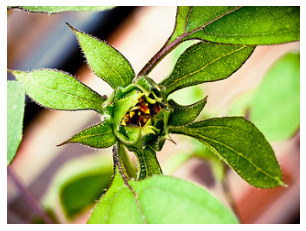

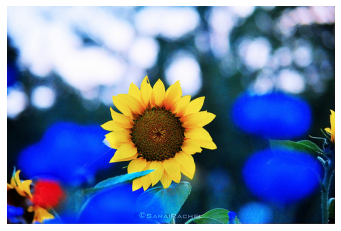

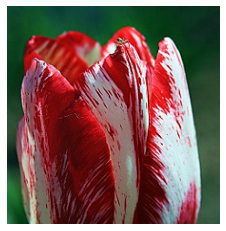

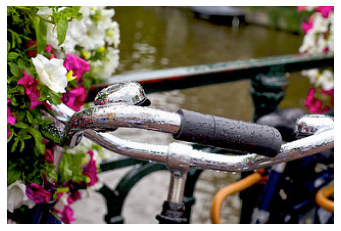

In [60]:
import matplotlib.image as mpimg
pic_index = 2

next_daisy = [os.path.join(daisy_dir, fname) 
                for fname in daisy_files[pic_index-2:pic_index]]
next_dandelion = [os.path.join(dandelion_dir, fname) 
                for fname in dandelion_files[pic_index-2:pic_index]]
next_rose = [os.path.join(rose_dir, fname) 
                for fname in rose_files[pic_index-2:pic_index]]
next_sunflower = [os.path.join(sunflower_dir, fname) 
                for fname in sunflower_files[pic_index-2:pic_index]]
next_tulip = [os.path.join(tulip_dir, fname) 
                for fname in tulip_files[pic_index-2:pic_index]]                


for i, img_path in enumerate(next_daisy+next_dandelion+next_rose+next_sunflower+next_tulip):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.91):
      print("\nReached 91% accuracy, canceling training")
      self.model.stop_training = True

callbacks = myCallback()

In [61]:
#callbacks = myCallback()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [62]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 26, 26, 64)      

In [63]:
train_dir = "/tmp/flower-classification-main/flowerssplit/train"
train_datagen = ImageDataGenerator(rescale = 1./255, 
      rotation_range=0.1,
      width_shift_range=0.1,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest'
      
      )

validation_dir = "/tmp/flower-classification-main/flowerssplit/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=64
)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [64]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [65]:
history = model.fit(train_generator, epochs=80,
                    steps_per_epoch=5,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=5)


Epoch 1/80
5/5 [==============================] - 45s 9s/step - loss: 1.5910 - accuracy: 0.1937 - val_loss: 1.5358 - val_accuracy: 0.1937
Epoch 2/80
5/5 [==============================] - 43s 9s/step - loss: 1.5190 - accuracy: 0.3219 - val_loss: 1.3857 - val_accuracy: 0.3656
Epoch 3/80
5/5 [==============================] - 41s 9s/step - loss: 1.4335 - accuracy: 0.3688 - val_loss: 1.3952 - val_accuracy: 0.3844
Epoch 4/80
5/5 [==============================] - 43s 9s/step - loss: 1.3945 - accuracy: 0.3719 - val_loss: 1.3218 - val_accuracy: 0.3719
Epoch 5/80
5/5 [==============================] - 43s 9s/step - loss: 1.3307 - accuracy: 0.4250 - val_loss: 1.5922 - val_accuracy: 0.4031
Epoch 6/80
5/5 [==============================] - 43s 9s/step - loss: 1.4191 - accuracy: 0.4094 - val_loss: 1.4310 - val_accuracy: 0.2812
Epoch 7/80
5/5 [==============================] - 41s 8s/step - loss: 1.3688 - accuracy: 0.3844 - val_loss: 1.4194 - val_accuracy: 0.3469
Epoch 8/80
5/5 [==================

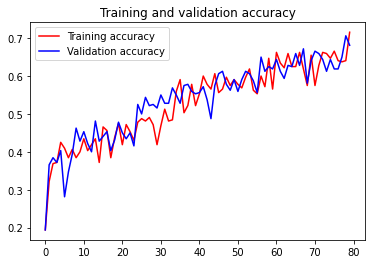

<Figure size 432x288 with 0 Axes>

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()